In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\90530\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
data = pd.read_csv('IMDB Dataset.csv')

df = data.copy()

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.shape

(50000, 2)

<Axes: >

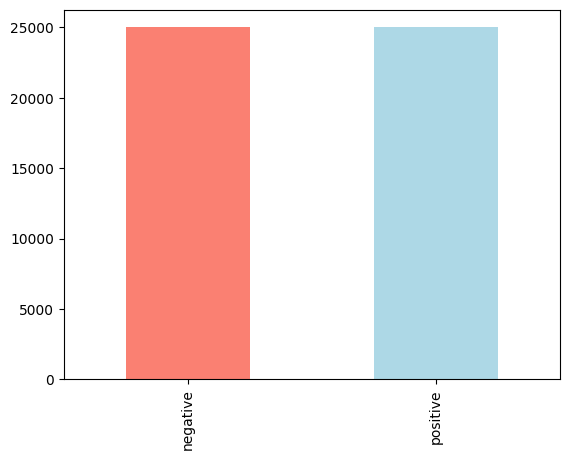

In [10]:
df['sentiment'].value_counts().sort_index().plot(kind='bar', color=['salmon', 'lightblue'])

### Sample Preprocessing

In [11]:
sample = df['review'][1]
sample

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [12]:
sample = BeautifulSoup(sample).get_text()
sample

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [13]:
sample = re.sub('[^a-zA-Z]', ' ', sample)
sample

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [14]:
sample = sample.lower()
sample

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

In [15]:
eng_stopwords = stopwords.words('english')
eng_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
sample = [word for word in sample.split() if word not in eng_stopwords]
sample[0:10]

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion']

### Preprocessing

In [17]:
eng_stopwords = stopwords.words('english')

def preprocessing(review):

    review = BeautifulSoup(review).get_text()
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = [word for word in review.split() if word not in eng_stopwords]

    return ' '.join(review)

df['review'] = df['review'].apply(preprocessing)

In [18]:
y = df['sentiment']
X = df['review']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


vectorizer = CountVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, y_train.shape

((40000, 5000), (40000,))

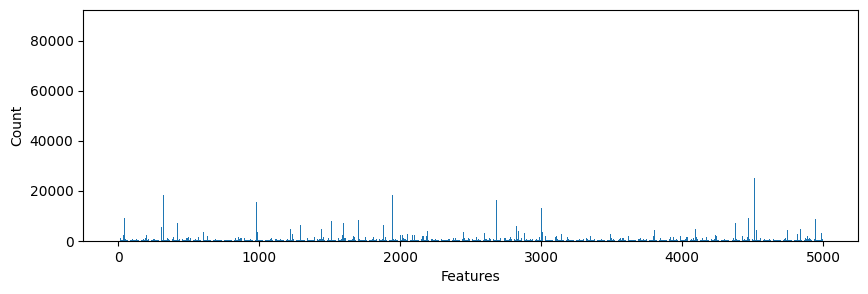

In [19]:
num_samples, num_features = X_train_vec.shape

sum_train = X_train_vec.sum(axis=0)
sum_test = X_test_vec.sum(axis=0)

plt.figure(figsize=(10, 3))
plt.bar(range(num_features), (sum_train + sum_test).tolist()[0])
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train_vec, y_train)

y_pred = model_lr.predict(X_test_vec)
accuracy_score(y_test, y_pred)

0.873

In [57]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    random_state=42
)

model_rf.fit(X_train_vec, y_train)

y_pred = model_rf.predict(X_test_vec)
accuracy_score(y_test, y_pred)

0.8508

In [59]:
sample_neg_text = [
    """
    This movie was undeniably the worst film I have ever had the displeasure of viewing. 
    The experience was so disappointing that I can confidently say I will never subject myself to it again.
    """
]
sample_neg_text = vectorizer.transform(sample_neg_text)
sample_neg_text

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [60]:
print('LogisticREgression:', model_lr.predict(sample_neg_text)[0])
print('RandomForest:',model_rf.predict(sample_neg_text)[0])

LogisticREgression: negative
RandomForest: negative
